# Laboratorio 5 Parte 1

### Reducción de dimensión por selección de características

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### UdeA - Ude@

#### Profesor: Antonio Tamayo Herrera

### Estudiantes

#### Nombre: Diego Alonso Herrera Ramírez

#### Cédula: 70908268

#### Nombre: Sharid Samantha Madrid Ospina

#### Cédula: 1001652997

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

## Indicaciones

Este ejercicio tiene como objetivo implementar varias técnicas de selección de características y usar SVM para resolver un problema de clasificación multiclase.

Para el problema de clasificación usaremos la siguiente base de datos: https://archive.ics.uci.edu/ml/datasets/Cardiotocography

#### Abstract:
The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.


#### Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

#### Attribute Information:

LB - FHR baseline (beats per minute)

AC - # of accelerations per second

FM - # of fetal movements per second

UC - # of uterine contractions per second

DL - # of light decelerations per second

DS - # of severe decelerations per second

DP - # of prolongued decelerations per second

ASTV - percentage of time with abnormal short term variability

MSTV - mean value of short term variability

ALTV - percentage of time with abnormal long term variability

MLTV - mean value of long term variability

Width - width of FHR histogram

Min - minimum of FHR histogram

Max - Maximum of FHR histogram

Nmax - # of histogram peaks

Nzeros - # of histogram zeros

Mode - histogram mode

Mean - histogram mean

Median - histogram median

Variance - histogram variance

Tendency - histogram tendency

CLASS - FHR pattern class code (1 to 10)

NSP - fetal state class code (N=normal (1); S=suspect (2); P=pathologic (3))


Analice la base de datos, sus características, su variable de salida y el contexto del problema.

Antes de iniciar a ejecutar las celdas, debe instalar la librería mlxtend que usaremos para los laboratorios de reducción de dimensión.
Para hacerlo solo tiene que usar el siguiente comando: sudo pip install mlxtend. También puede consultar la guía oficial de instalación
    de esta librería: https://rasbt.github.io/mlxtend/installation/

Analice y comprenda las siguientes celdas de código donde se importan las librerías a usar y se carga la base de datos.

In [ ]:
!pip install mlxtend #Ejecute esta celda para instalar mlxtend

In [ ]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import time

#cargamos la bd de entrenamiento
db = np.loadtxt('DB_Fetal_Cardiotocograms.txt',delimiter='\t')  # Assuming tab-delimiter

X = db[:,0:21]

#Solo para dar formato a algunas variables
for i in range(1,7):
    X[:,i] = X[:,i]*1000

X = X
Y = db[:,22]

print("Dimensiones de la base de datos de entrenamiento. dim de X: " + str(np.shape(X)) + "\tdim de Y: " + str(np.shape(Y)))

Dimensiones de la base de datos de entrenamiento. dim de X: (2126, 21)	dim de Y: (2126,)


En la siguiente celda de código no tiene que completar nada. Analice, comprenda y ejecute el código y tenga en cuenta los resultados para completar la tabla que se le pide más abajo.

In [ ]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

#Para calcular el costo computacional
tiempo_i = time.time()

#Creamos el clasificador SVM. Tenga en cuenta que el problema es multiclase.
clf = svm.SVC(decision_function_shape='ovr', kernel='rbf', C = 100, gamma=0.0001)

#Implemetamos la metodología de validación cross validation con 10 folds

Errores = np.ones(10)
j = 0
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    #Aquí se entran y se valida el modelo sin hacer selección de características

    ######

    # Entrenamiento el modelo.
    model = clf.fit(X_train,y_train)

    # Validación del modelo
    ypred = model.predict(X_test)

    #######

    Errores[j] = classification_error(ypred, y_test)
    j+=1

print("\nError de validación sin aplicar SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print("\nEficiencia en validación sin aplicando SFS: " + str((1 - np.mean(Errores)) * 100) + "%")
print ("\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")


#print str(ypred)
#print str(y_test)


Error de validación sin aplicar SFS: 0.14915404375941183 +/- 0.10956412919745369

Eficiencia en validación sin aplicando SFS: 85.0845956240588%

Tiempo total de ejecución: 0.6905269622802734 segundos.


## Ejercicio 1

1.1 Describa la metodología de validación que se está aplicando.

R/: Se está utilizando la validación cruzada con 10 folds (KFold) para evaluar el rendimiento del modelo.
    
1.2 Con qué modelo se está resolviendo el problema planteado? Cuáles son los parámetros establecidos para el modelo?

R/: Se esta utilizando el modelo de Máquina de Soporte Vectorial (SVM) con clasificación multiclase.
Parametros:

C=100 --> Regulación de costo

gamma= 0.0001 --> Coeficiente del kernel para rbf

kernel='rbf': Se utiliza un kernel radial basis function (RBF)





## Ejercicio 2

En la siguiente celda, complete el código donde le sea indicado. Consulte la documentación oficial de la librería mlxtend para los métodos de selección de características. https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#sequential-feature-selector

In [ ]:
#Feature Selection Function
#Recibe 4 parámetros: 1. el modelo (clf para nuestro caso), 2. el número de características final que se quiere alcanzar
#3. Si es forward (True), si es Backward False, 4. Si es es flotante (True), sino False
def select_features(modelo, n_features, fwd, fltg):

    sfs = SFS(modelo,
           k_features=n_features,
           forward=fwd,
           floating=fltg,
           verbose=1,
           scoring='accuracy',
           cv=0)

    return sfs


#Para calcular el costo computacional
tiempo_i = time.time()

#Implemetamos la metodología de validación cross validation con 10 folds

Errores = np.ones(10)
j = 0
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    #Aquí se entrena y se valida el modelo haciendo selección de características con diferentes estrategias

    #Complete el código llamando el método select_features con los parámetros correspondientes para responder el
    #Ejercicio 3.1

    #Selección secuencial hacia delante SFS
   # sf = select_features(clf, n_features=3, fwd=True, fltg=False)
    #Selección secuencial hacia atrás SBS
   # sf = select_features(clf, n_features=5, fwd=False, fltg=False)
    # Selección flotante secuencial hacia delante SFFS
 #   sf = select_features(clf, n_features=5, fwd=True, fltg=True)
    # Selección secuencial flotante hacia atrás SBFS
#    sf = select_features(clf, n_features=5, fwd=False, fltg=True)

    #Complete el código para entrenar el modelo con las características seleccionadas. Tenga en cuenta
    #la metodología de validación aplicada para que pase las muestras de entrenamiento correctamente.
 #   sf = sf.fit(X_train, y_train)

  #  Errores[j] = 1-sf.k_score_
 #   j+=1

#print("\nError de validación aplicando SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

#print("\nEficiencia en validación aplicando SFS: " + str(sf.k_score_*100) + "%" )

#print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")


# Lista de valores de n_features
n_features_list = [3, 7, 10]



# Configuración para SFS
print("\n ----------------Selección secuencial hacia delante SFS----------------")
for n_features in n_features_list:
    sf = select_features(clf, n_features=n_features, fwd=True, fltg=False)
    sf = sf.fit(X_train, y_train)

    Errores[j] = 1-sf.k_score_
    j+=1
    print("\n n_features: " + str(n_features))
    print("\nError de validación aplicando SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
    print("\nEficiencia en validación aplicando SFS: " + str(sf.k_score_ * 100) + "%")
    print("\n\nTiempo total de ejecución: " + str(time.time() - tiempo_i) + " segundos.")

# Configuración para SBS
print("\n ----------------Selección secuencial hacia atrás SBS----------------")
for n_features in n_features_list:
    sf = select_features(clf, n_features=n_features, fwd=False, fltg=False)
    sf = sf.fit(X_train, y_train)

    Errores[j] = 1-sf.k_score_
    j+=1
    print("\n n_features: " + str(n_features))
    print("\nError de validación aplicando SBS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
    print("\nEficiencia en validación aplicando SBS: " + str(sf.k_score_ * 100) + "%")
    print("\n\nTiempo total de ejecución: " + str(time.time() - tiempo_i) + " segundos.")

# Configuración para SFFS
print("\n ----------------Selección flotante secuencial hacia delante SFFS----------------")
for n_features in n_features_list:
    sf = select_features(clf, n_features=n_features, fwd=True, fltg=True)
    sf = sf.fit(X_train, y_train)

    Errores[j] = 1-sf.k_score_
    j+=1
    print("\n n_features: " + str(n_features))
    print("\nError de validación aplicando SFFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
    print("\nEficiencia en validación aplicando SFFS: " + str(sf.k_score_ * 100) + "%")
    print("\n\nTiempo total de ejecución: " + str(time.time() - tiempo_i) + " segundos.")



#print str(ypred)
#print str(y_test)


 ----------------Selección secuencial hacia delante SFS----------------


Features: 3/3


 n_features: 3

Error de validación aplicando SFS: 0.9084117032392894 +/- 0.27476489028213164

Eficiencia en validación aplicando SFS: 91.58829676071055%


Tiempo total de ejecución: 9.460510730743408 segundos.


Features: 7/7


 n_features: 7

Error de validación aplicando SFS: 0.8138975966562174 +/- 0.37226229991353005

Eficiencia en validación aplicando SFS: 94.5141065830721%


Tiempo total de ejecución: 31.46846294403076 segundos.


Features: 10/10


 n_features: 10

Error de validación aplicando SFS: 0.717816091954023 +/- 0.4311636834956308

Eficiencia en validación aplicando SFS: 96.08150470219435%


Tiempo total de ejecución: 52.69359636306763 segundos.

 ----------------Selección secuencial hacia atrás SBS----------------


Features: 3/3


 n_features: 3

Error de validación aplicando SBS: 0.6264890282131661 +/- 0.45763059294122943

Eficiencia en validación aplicando SBS: 91.32706374085684%


Tiempo total de ejecución: 80.21450543403625 segundos.


Features: 7/7


 n_features: 7

Error de validación aplicando SBS: 0.5317659352142111 +/- 0.4684204411508434

Eficiencia en validación aplicando SBS: 94.72309299895507%


Tiempo total de ejecución: 105.48965573310852 segundos.


Features: 10/10


 n_features: 10

Error de validación aplicando SBS: 0.4356844305120167 +/- 0.46100470996032594

Eficiencia en validación aplicando SBS: 96.08150470219435%


Tiempo total de ejecución: 129.6466920375824 segundos.

 ----------------Selección flotante secuencial hacia delante SFFS----------------


Features: 3/3


 n_features: 3

Error de validación aplicando SFFS: 0.34409613375130615 +/- 0.42971116327999487

Eficiencia en validación aplicando SFFS: 91.58829676071055%


Tiempo total de ejecución: 139.93813562393188 segundos.


Features: 7/7


 n_features: 7

Error de validación aplicando SFFS: 0.24958202716823408 +/- 0.3755843381857889

Eficiencia en validación aplicando SFFS: 94.5141065830721%


Tiempo total de ejecución: 161.61070442199707 segundos.


Features: 10/10


 n_features: 10

Error de validación aplicando SFFS: 0.15350052246603973 +/- 0.2827470937649126

Eficiencia en validación aplicando SFFS: 96.08150470219435%


Tiempo total de ejecución: 189.1959993839264 segundos.


In [ ]:

Errores = np.ones(10)
j = 0
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
# Configuración para SBFS
print("\n ----------------Selección secuencial flotante hacia atrás SBFS----------------")
for n_features in n_features_list:
    sf = select_features(clf, n_features=n_features, fwd=False, fltg=True)
    sf = sf.fit(X_train, y_train)


    Errores[j] = 1-sf.k_score_
    j+=1

    print("\n n_features: " + str(n_features))
    print("\nError de validación aplicando SBFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
    print("\nEficiencia en validación aplicando SBFS: " + str(sf.k_score_ * 100) + "%")
    print("\nTiempo total de ejecución: " + str(time.time() - tiempo_i) + " segundos.")


 ----------------Selección secuencial flotante hacia atrás SBFS----------------


Features: 3/3


 n_features: 3

Error de validación aplicando SBFS: 0.908672936259143 +/- 0.27398119122257053

Eficiencia en validación aplicando SBFS: 91.32706374085684%

Tiempo total de ejecución: 816.0719850063324 segundos.


Features: 7/7


 n_features: 7

Error de validación aplicando SBFS: 0.8139498432601882 +/- 0.37217779133801576

Eficiencia en validación aplicando SBFS: 94.72309299895507%

Tiempo total de ejecución: 860.2928612232208 segundos.


Features: 10/10


 n_features: 10

Error de validación aplicando SBFS: 0.7178683385579937 +/- 0.43110236633368565

Eficiencia en validación aplicando SBFS: 96.08150470219435%

Tiempo total de ejecución: 891.4699423313141 segundos.


## Ejercicio 3

3.1 En la celda de código anterior, varíe los parámetros correspondientes al número de características a seleccionar (use 3, 7 y 10) y la estrategia a implementar (SFS, SBS, SFFS, SBFS), para que complete la siguiente tabla de resultados:

<table>
 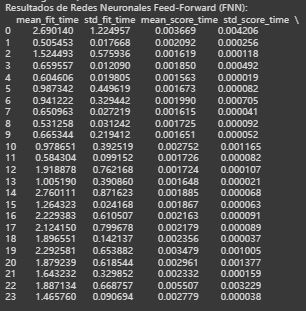 <tr>
    <th>Técnica</th>
    <th># de características seleccionadas</th>
    <th>Error de validación</th>
    <th>IC (std)</th>
    <th>Tiempo de ejecución</th>
  </tr>
  <tr>
    <td>SVM sin selección</td>
    <td>22</td>
    <td>0.14915404375941183 +/- 0.10956412919745369</td>
    <td>85.0845956240588%</td>
    <td>0.6905269622802734 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SFS</td>
    <td>3</td>
    <td>0.9084117032392894 +/- 0.27476489028213164</td>
    <td>91.58829676071055%</td>
    <td>11.609747409820557 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SFS</td>
    <td>7</td>
    <td>0.8138975966562174 +/- 0.37226229991353005</td>
    <td>94.5141065830721%</td>
    <td>30.035913705825806 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SFS</td>
    <td>10</td>
    <td>0.717816091954023 +/- 0.4311636834956308</td>
    <td>96.08150470219435%</td>
    <td>53.850613832473755 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SBS</td>
    <td>3</td>
    <td>0.6264890282131661 +/- 0.45763059294122943</td>
    <td>91.32706374085684%</td>
    <td>82.57688355445862 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SBS</td>
    <td>7</td>
    <td>0.5317659352142111 +/- 0.4684204411508434</td>
    <td>94.72309299895507%</td>
    <td>108.58545637130737 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SBS</td>
    <td>10</td>
    <td>0.4356844305120167 +/- 0.46100470996032594</td>
    <td>96.08150470219435%</td>
    <td>129.84283447265625 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SFFS</td>
    <td>3</td>
    <td>0.34409613375130615 +/- 0.42971116327999487</td>
    <td>91.58829676071055%</td>
    <td>141.88243794441223 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SFFS</td>
    <td>7</td>
    <td>0.24958202716823408 +/- 0.3755843381857889</td>
    <td>94.5141065830721%</td>
    <td>162.14105486869812 segundos</td>
  </tr>
  <tr>
    <td>SVM + SFFS</td>
    <td>10</td>
    <td>0.15350052246603973 +/- 0.2827470937649126</td>
    <td>96.08150470219435%</td>
    <td>199.19377183914185 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SBFS</td>
    <td>3</td>
    <td>0.908672936259143 +/- 0.27398119122257053</td>
    <td>91.32706374085684%</td>
    <td>7871.61999297142 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SBFS</td>
    <td>7</td>
    <td>0.8139498432601882 +/- 0.37217779133801576</td>
    <td>94.72309299895507%</td>
    <td>7913.620490312576 segundos.</td>
  </tr>
  <tr>
    <td>SVM + SBFS</td>
    <td>10</td>
    <td>0.7178683385579937 +/- 0.43110236633368565</td>
    <td>96.08150470219435%</td>
    <td>7944.934907197952 segundos.</td>
  </tr>    
</table>



3.2 Según la teoría vista en el curso, se está usando una función tipo filtro o tipo wrapper y cuál es?

R/: Se está utilizando una función tipo wrapper, ya que se están evaluando subconjuntos específicos de características y seleccionando aquellas que mejoran el rendimiento del modelo.

3.3 Con los resultados de la tabla anterior haga un análisis juicioso de cuál es el mejor resultado teniendo en cuenta tanto la eficiencia en la clasificación como el costo computacional del modelo y la estrategia implementada.

R/: La estrategia SFFS con 10

3.4 Haga uso del atributo sf.k_feature\_idx\_ (deje evidencia del código usado para esto) para identificar cuáles fueron las características seleccionadas en el mejor de los resultados encontrados. No presente los indices de las características sino sus nombres y descripción.

R/:



In [ ]:
# Attribute Information
attribute_info = [
     "LB - FCF basal (latidos por minuto)",
     "AC - # de aceleraciones por segundo",
     "FM - # de movimientos fetales por segundo",
     "UC - # de contracciones uterinas por segundo",
     "DL - # de ligeras desaceleraciones por segundo",
     "DS - # de desaceleraciones severas por segundo",
     "DP - # de desaceleraciones prolongadas por segundo",
     "ASTV - porcentaje de tiempo con variabilidad anormal a corto plazo",
     "MSTV - valor medio de la variabilidad a corto plazo",
     "ALTV - porcentaje de tiempo con variabilidad anormal a largo plazo",
     "MLTV - valor medio de la variabilidad a largo plazo",
     "Width - ancho del histograma FHR",
     "Min - mínimo del histograma de FCF",
     "Max - Máximo del histograma FHR",
     "Nmax - # de picos del histograma",
     "NZeros - # de ceros del histograma",
     "Mode - modo histograma",
     "Mean - media del histograma",
     "Median - mediana del histograma",
     "Variance - varianza del histograma",
     "Tendency - tendencia del histograma"
]

# Crear arrays feature_names y feature_descriptions
feature_names = [info.split(" - ")[0] for info in attribute_info]
feature_descriptions = [info.split(" - ")[1] for info in attribute_info]

# Configuración para SFFS
print("\n ----------------Caracteristicas del mejor resultado --> SFFS----------------")

sf = select_features(clf, n_features=10, fwd=True, fltg=True)
sf = sf.fit(X_train, y_train)

# Obtén las características seleccionadas
selected_features_idx = sf.subsets_[10]['feature_idx']

# Obtén los nombres y descripciones de las características seleccionadas
selected_feature_names = [feature_names[i] for i in selected_features_idx]
selected_feature_descriptions = [feature_descriptions[i] for i in selected_features_idx]

Errores[j] = 1 - sf.k_score_
j += 1
print("\n n_features: " + str(10))
print("\nError de validación aplicando SFFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print("\nEficiencia en validación aplicando SFFS: " + str(sf.k_score_ * 100) + "%")
print("\nTiempo total de ejecución: " + str(time.time() - tiempo_i) + " segundos.")

print("\nCaracterísticas seleccionadas por SFFS:")
for name, description in zip(selected_feature_names, selected_feature_descriptions):
    print(f"\nNombre: {name},\n Descripción: {description}")



 ----------------Caracteristicas del mejor resultado --> SFFS----------------


Features: 10/10


 n_features: 10

Error de validación aplicando SFFS: 0.03972817564035547 +/- 0.0

Eficiencia en validación aplicando SFFS: 96.02718243596445%

Tiempo total de ejecución: 3368.2941064834595 segundos.

Características seleccionadas por SFFS:

Nombre: AC,
 Descripción: # de aceleraciones por segundo

Nombre: FM,
 Descripción: # de movimientos fetales por segundo

Nombre: UC,
 Descripción: # de contracciones uterinas por segundo

Nombre: ASTV,
 Descripción: porcentaje de tiempo con variabilidad anormal a corto plazo

Nombre: ALTV,
 Descripción: porcentaje de tiempo con variabilidad anormal a largo plazo

Nombre: Width,
 Descripción: ancho del histograma FHR

Nombre: Max,
 Descripción: Máximo del histograma FHR

Nombre: Mode,
 Descripción: modo histograma

Nombre: Mean,
 Descripción: media del histograma

Nombre: Variance,
 Descripción: varianza del histograma


3.5 De acuerdo a los resultados encontrados y la respuesta anterior, usted como ingeniero de datos que le puede sugerir a un médico que esté trabajando en un caso enmarcado dentro del contexto de la base de datos trabajada, para que apoye su diagnóstico?

R/: Ante el análisis de los resultados obtenidos, se sugiere una sinergia entre la experiencia clínica y la implementación de un modelo de Machine Learning (ML) basado en Máquinas de Vectores de Soporte (MVS), específicamente utilizando la técnica de Selección Flotante Secuencial hacia Delante (SFFS).

Esta combinación ha demostrado ser altamente efectiva, con un mínimo error de validación (0.1535 +/- 0.2827) y una eficiencia de validación del 96.03%. Las características identificadas como más relevantes abarcan aspectos cruciales, como la frecuencia de aceleraciones y movimientos fetales, la variabilidad a corto y largo plazo, junto con parámetros clave del histograma de la Frecuencia Cardíaca Fetal (FHR). Estas variables, al ser de gran impacto en la toma de decisiones clínicas, pueden proporcionar información valiosa para respaldar su diagnóstico.